In [31]:
import mat73
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

In [32]:
sys.path.append(r'../utils/')

from mostrarDatos import visualizarPerfiles
from segmentarDatos import obtenerExperimento

In [33]:
data = mat73.loadmat(r'../datos/experimento3_sep.mat')

X = data["X"]
U = data["U"]
N = data["N"]

sizeExp = np.insert(data["N"],0,0).astype(int)
sizeExp = sizeExp[1:]

tm = 5e-3 # Tiempo de muestreo
Q = np.size(U,0) # Número de muestras
t = np.arange(0, Q*tm, tm) # Vector de tiempo

print(f"Dimensiones de los datos = {X.T.shape} (espacio, tiempo)")
print(f"Número de experimentos : {len(sizeExp)-1}")
print(f"Longitud de los primeros 5 experimentos : {sizeExp[:5]}")

Dimensiones de los datos = (500, 11953) (espacio, tiempo)
Número de experimentos : 35
Longitud de los primeros 5 experimentos : [318 340 340 359 341]


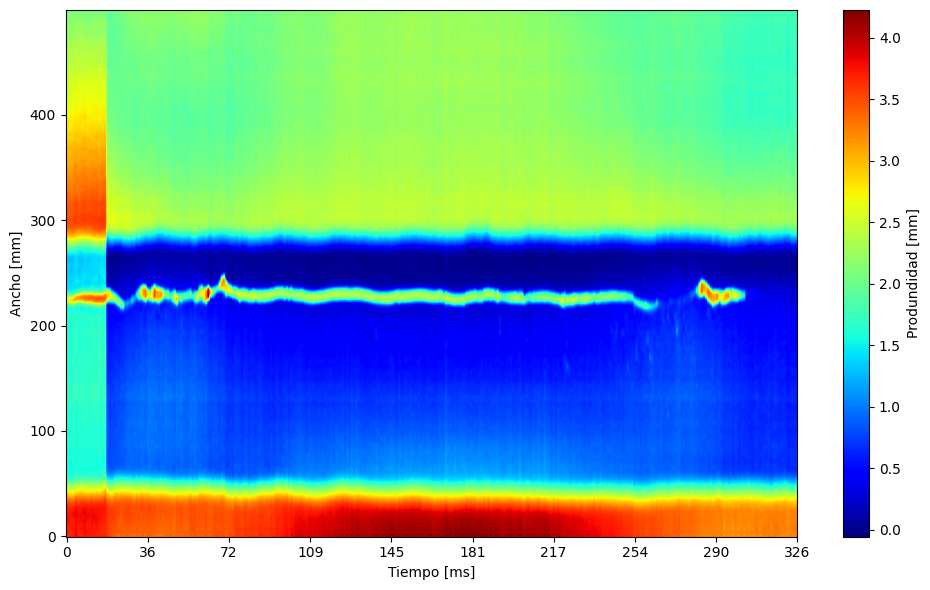

In [34]:
XX, UU = obtenerExperimento(X,U,sizeExp,34)
visualizarPerfiles(XX, colormap='jet')

# En experimento 2, 30, 34 hay una burbuja de aire
# En experimento 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29 hay flujo inestable

In [35]:
# Etiquetado de los datos
Y = np.zeros((Q,1))

# 3 clases -> 0: estable, 1: burbuja, 2: inestable

# Experimento 3
XX, UU = obtenerExperimento(X,U,sizeExp,3)
Y3 = np.zeros((np.size(UU,1),1))
Y3[210:221] = 1
Y[sum(sizeExp[:3]):sum(sizeExp[:3+1])] = Y3

# Experimento 13
XX, UU = obtenerExperimento(X,U,sizeExp,13)
Y13 = np.zeros((np.size(UU,1),1))
Y13[16:] = 2
Y[sum(sizeExp[:13]):sum(sizeExp[:13+1])] = Y13

# Experimento 14
XX, UU = obtenerExperimento(X,U,sizeExp,14)
Y14 = np.ones((np.size(UU,1),1))*2
Y[sum(sizeExp[:14]):sum(sizeExp[:14+1])] = Y14

# Experimento 15
XX, UU = obtenerExperimento(X,U,sizeExp,15)
Y15 = np.ones((np.size(UU,1),1))*2
Y[sum(sizeExp[:15]):sum(sizeExp[:15+1])] = Y15

# Experimento 16
XX, UU = obtenerExperimento(X,U,sizeExp,16)
Y16 = np.ones((np.size(UU,1),1))*2
Y[sum(sizeExp[:16]):sum(sizeExp[:16+1])] = Y16

# Experimento 17
XX, UU = obtenerExperimento(X,U,sizeExp,17)
Y17 = np.ones((np.size(UU,1),1))*2
Y[sum(sizeExp[:17]):sum(sizeExp[:17+1])] = Y17

# Experimento 19
XX, UU = obtenerExperimento(X,U,sizeExp,19)
Y19 = np.zeros((np.size(UU,1),1))
Y19[20:] = 2
Y[sum(sizeExp[:19]):sum(sizeExp[:19+1])] = Y19

# Experimento 20
XX, UU = obtenerExperimento(X,U,sizeExp,20)
Y20 = np.zeros((np.size(UU,1),1))
Y20[:304] = 2
Y[sum(sizeExp[:20]):sum(sizeExp[:20+1])] = Y20

# Experimento 21
XX, UU = obtenerExperimento(X,U,sizeExp,21)
Y21 = np.zeros((np.size(UU,1),1))
Y21[:325] = 2
Y[sum(sizeExp[:21]):sum(sizeExp[:21+1])] = Y21

# Experimento 22
XX, UU = obtenerExperimento(X,U,sizeExp,22)
Y22 = np.zeros((np.size(UU,1),1))
Y22[:94] = 2
Y[sum(sizeExp[:22]):sum(sizeExp[:22+1])] = Y22

# Experimento 23
XX, UU = obtenerExperimento(X,U,sizeExp,23)
Y23 = np.zeros((np.size(UU,1),1))
Y23[:180] = 2
Y[sum(sizeExp[:23]):sum(sizeExp[:23+1])] = Y23

# Experimento 25
XX, UU = obtenerExperimento(X,U,sizeExp,25)
Y25 = np.zeros((np.size(UU,1),1))
Y25[80:] = 2
Y[sum(sizeExp[:25]):sum(sizeExp[:25+1])] = Y25

# Experimento 26
XX, UU = obtenerExperimento(X,U,sizeExp,26)
Y26 = np.zeros((np.size(UU,1),1))
Y26[220:] = 2
Y[sum(sizeExp[:26]):sum(sizeExp[:26+1])] = Y26

# Experimento 27
XX, UU = obtenerExperimento(X,U,sizeExp,27)
Y27 = np.zeros((np.size(UU,1),1))
Y27[77:] = 2
Y[sum(sizeExp[:27]):sum(sizeExp[:27+1])] = Y27

# Experimento 28
XX, UU = obtenerExperimento(X,U,sizeExp,28)
Y28 = np.ones((np.size(UU,1),1))*2
Y[sum(sizeExp[:28]):sum(sizeExp[:28+1])] = Y28

# Experimento 29
XX, UU = obtenerExperimento(X,U,sizeExp,29)
Y29 = np.zeros((np.size(UU,1),1))
Y29[80:] = 2
Y[sum(sizeExp[:29]):sum(sizeExp[:29+1])] = Y29

# Experimento 30
XX, UU = obtenerExperimento(X,U,sizeExp,30)
Y30 = np.zeros((np.size(UU,1),1))
Y30[15:70] = 1
Y[sum(sizeExp[:30]):sum(sizeExp[:30+1])] = Y30

# Experimento 34
XX, UU = obtenerExperimento(X,U,sizeExp,34)
Y34 = np.zeros((np.size(UU,1),1))
Y34[28:72] = 1
Y34[250:] = 1
Y[sum(sizeExp[:34]):sum(sizeExp[:34+1])] = Y34
